# Análise de Concessão de Crédito
EBAC | Módulo Python: Projeto Final<br>
Aluno | Autor: [Icaro Martins](https://www.linkedin.com/in/1caro-martins/) </br>
Data de criação: 27/082023

---

# **Tópicos**

<ol type="1">
  <li>Descrição do problema;</li>
  <li>Exploração de Dados;</li>
  <li>Transformação e Limpeza de Dados;</li>
  <li>Análise de Dados;</li>
  <li>Resumo dos insights gerados,</li>
</ol>

---

## 1\. Descrição do problema

O arquivo credito.csv contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a coluna **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender por que um cliente deixa de honrar com suas dívidas, baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira.

> O atributo de interesse (`default`) é nossa **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são as **variáveis explicatívas**, **variáveis independentes** ou **variáveis preditoras**.


| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

## 2\. Exploração de Dados

* Bibliotecas de auxílio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

* igonorarando os warnings de execução para deixar o estudo limpo

In [2]:
warnings.filterwarnings("ignore")

* Carregando dados em um DataFrame e configurando dados faltantes como NA

In [3]:
credito_df = pd.read_csv('/kaggle/input/ebac-credito/Python_M10_support material.csv', sep=',', na_values='na')
credito_df.head() # primeiras 5 linhas

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### **2.1. Estrutura**

Vamos ver o formato da nossa tabela, isto é o número de linhas e número de colunas

In [4]:
credito_df.shape # linhas, colunas

(10127, 16)

Vamos mostrar as colunas (cabeçalhos) da tabela

In [5]:
credito_df.columns # colunas

Index(['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade',
       'estado_civil', 'salario_anual', 'tipo_cartao',
       'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')

E por fim, vamos olhar a coluna **default**, que é nosso atributo de interesse, para verificar a proporção de clientes adimplentes(`default = 0`) e clientes inadimplentes (`default = 1`) na nossa base de dados.

In [6]:
qtd_total, _ = credito_df.shape
qtd_adimplentes, _ = credito_df[credito_df['default'] == 0].shape
qtd_inadimplentes, _ = credito_df[credito_df['default'] == 1].shape

print(f'A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Assim, após esse conhecimento inicial da tabela, conclui-se que a base de dados é desbalanceada em relação a variável resposta, pois há muito mais clientes adimplentes do que clientes inadimplentes.

### **2.2. Schema**

* Amostrando os dados

In [7]:
credito_df.sample(n=5) # cinco linhas aleatórias

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
2538,788784258,0,60,M,2,ensino medio,casado,NaN,blue,41,5,4,2,"3.007,83","1.475,38",31
5936,718866633,0,46,M,2,graduacao,casado,$80K - $120K,blue,36,5,2,4,"33.142,34","4.347,67",63
3711,711891933,0,47,M,3,ensino medio,casado,$80K - $120K,blue,40,3,3,3,"12.945,76","3.369,95",59
2326,716207508,0,36,M,3,ensino medio,casado,$60K - $80K,blue,36,5,4,2,"5.497,24","1.981,69",38
5962,787475433,0,36,F,2,doutorado,solteiro,NaN,blue,23,5,3,2,"6.966,46","4.855,04",69


* Verificando o tipo de dados das colunas

In [8]:
credito_df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Nota-se que as colunas **limite_credito** e **valor_transacoes_12m** foram identificadas pelo Pandas como colunas categóricas (object = string), pois a notação no Brasil utiliza vírgula ao invés de ponto para separar casas decimais.

* Descrevendo as variáveis categóricas (contagem, valores distintos, moda e frequência)

In [9]:
credito_df.describe(include='object').T

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Nota-se que as colunas **escolaridade**, **estado_civil**, e **salario_anual** têm uma contagem de valores menor que o restante das colunas, o que indica dados faltantes.

* Descrevendo as variáveis numéricas (contagem, média, desvio-padrão, mínimo, 1º quartil, 2º quartil, 3º quartil e máximo)

In [10]:
credito_df.drop('id', axis=1).describe().T # descrição de variáveis numéricas

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.3. Dados faltantes**

* Verificando a quantidade de dados faltantes em cada coluna

In [11]:
credito_df.isna().sum() # pesquisando valores 'na' (valor difinido como dado faltante ao carregar o arquivo)

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

* Criando uma função para calcular o percentual de dados faltantes das colunas

In [12]:
def calcular_percentual_dados_faltantes(df: pd.DataFrame) -> None:
    
    colunas_dados_faltantes = []
    
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col: round(100 * qtd/total, 2)}
            colunas_dados_faltantes.append(dict_dados_faltantes)

    for coluna in colunas_dados_faltantes:
        for k, v in coluna.items():
            print(f'{k}: {v}%')

* Verificando dados faltantes das colunas **escolaridade**, **estado_civil** e **salario_anual**

In [13]:
calcular_percentual_dados_faltantes(df=credito_df)

escolaridade: 15.0%
estado_civil: 7.4%
salario_anual: 10.98%


* Filtrando a tabela apenas com clientes adimplentes (`default = 0`) e verificando os dados faltantes nas colunas **escolaridade**, **estado_civil** e **salario_anual**

In [14]:
calcular_percentual_dados_faltantes(df=credito_df[credito_df['default'] == 0])

escolaridade: 14.86%
estado_civil: 7.29%
salario_anual: 10.88%


* Filtrando a tabela apenas com clientes inadimplentes (`default = 1`) e verificando os dados faltantes nas colunas **escolaridade**, **estado_civil** e **salario_anual**

In [15]:
calcular_percentual_dados_faltantes(df=credito_df[credito_df['default'] == 1])

escolaridade: 15.73%
estado_civil: 7.93%
salario_anual: 11.49%


Nota-se que os percentuais de dados faltantes das tabelas filtradas são equivalentes aos percentuais da tabela sem filtro. Deste modo, conclui-se que se eliminar esses dados, a proporção de clientes adimplentes e inadimplentes será mantida.

## 3\. Transformação e Limpeza de Dados

Iniciando *data wrangling* transformando e limpando dados para que possam ser melhor analisados.

### **3.1. Correção do Schema**

Vamos olhar as colunas com tipo de dados erradas

In [16]:
credito_df[['limite_credito', 'valor_transacoes_12m']].head() # 5 primeiras linhas das duas colunas

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


* Criando e testando uma função para transformar o tipo de dados das colunas

In [17]:
fn = lambda valor: float(valor.replace(".", "").replace(",", ".")) # retira o ponto, depois troca vírgula por ponto, e transforma string em float

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22'] # amostra para teste
valores_limpos = list(map(fn, valores_originais)) # utilizando a função map para aplicar a função anônima em uma lista de valores

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


* Aplicando a função (anônima) nas colunas **limite_credito** e **valor_transacoes_12m**

In [18]:
credito_df['valor_transacoes_12m'] = credito_df['valor_transacoes_12m'].apply(fn)
credito_df['limite_credito'] = credito_df['limite_credito'].apply(fn)

* Verificando novamente os tipos das colunas

In [19]:
credito_df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Nota-se que agora o Pandas reconhece as colunas **limite_credito** e **valor_transacoes_12m** como numéricas (tipo float).

* Estatísticas das variáveis categóricas

In [20]:
credito_df.describe(include='object').T

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


* Estatísticas das variáveis numéricas

In [21]:
credito_df.drop('id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Após transformarmos as colunas **limite_credito** e **valor_transacoes_12m** vemos agora suas descrições entre as colunas numéricas.</br>
Notam-se nessas colunas um alto desvio-padrão e que a média é mais elevada que a mediana (2º quartil). Mas não são notórios, em nossa base de dados, valores inconcistentes, como idade igual a 0 ou 200 anos, por exemplo.

### **3.2. Remoção dos Dados faltantes**

* Removendo linhas que contenham NA

In [22]:
credito_df.dropna(inplace=True)

* Olhando o formato da tabela (linhas, colunas), após a remoção de dados

In [23]:
credito_df.shape

(7081, 16)

* Comparando proporção de adimplentes e inadimplentes antes e depois da remoção dos dados

In [24]:
qtd_total_novo, _ = credito_df.shape
qtd_adimplentes_novo, _ = credito_df[credito_df['default'] == 0].shape
qtd_inadimplentes_novo, _ = credito_df[credito_df['default'] == 1].shape

print(f'A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%')
print()
print(f'A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')
print(f'A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%')

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Conclui-se que embora o número de dados (linhas) da amostra tenha reduzido bastante, a proporção se manteve praticamente igual, e que agora a base de dados está consistente para análises.

## 4\. Visualização de Dados

Vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta e tentar entender qual fator leva um cliente a inadimplencia.

* Configurando espaço entre o título e o gráfico no MatplotLib

In [25]:
plt.rcParams['axes.titlepad'] = 30 # padding do Titulo

* Escolhendo um estilo e schema de cores para o Seaborn

In [26]:
sns.set_palette("colorblind") # paleta de Cores
sns.set_style("whitegrid") # estilo de gráficos

* Criando DataFrames de adimplentes e inadimplentes

In [27]:
adimplente_df = credito_df[credito_df['default'] == 0]
inadimplente_df = credito_df[credito_df['default'] == 1]

### **4.1. Visualizações Categóricas**

* Mostrando as colunas categóricas que serão analisadas

In [28]:
credito_df.select_dtypes('object').head() # 5 primeiras linhas

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


NOTA: A Lei nº 13.709, de 14 de agosto de 2018, ou Lei Geral de Proteção de Dados (LGPD), entrou em vigência em setembro de 2020 e estabelece regras sobre como os dados pessoais (de pessoa física) devem ser tratados nos meios físicos ou digitais. O objetivo da lei é proteger os direitos de liberdade e privacidade dos titulares de dados pessoais, trazendo maior transparência e controle sobre a utilização de seus dados.

As informações mais pessoais passaram a ser consideradas como “dados sensíveis” pela LGPD, aumentando a restrição de seu uso.

> Os dados sensíveis são informações que abrem margem para discriminação do indivíduo e que, portanto, merecem maior nível de proteção e cuidado. São dados que revelam convicção religiosa, opinião política, filiação a sindicato ou organização de caráter religioso, filosófico ou político, origem étnica ou racial, informações referentes à saúde, vida sexual, genética e biometria, quando vinculados a uma pessoa natural.

Deste modo, a coluna **sexo** será desconsiderada das análises.

* Criando uma função para gerar 3 gráficos de rosca lado a lado para 3 dataframes distintos

In [29]:
def gerar_graficos_rosca(coluna: str, titulos: list) -> None:
    
    plt_coluna = 0
    linhas = 1
    colunas = 3

    if len(titulos) == 3:
        fig, ax = plt.subplots(linhas, colunas, figsize=(15, 5), sharex=True) # 3 gráficos lado a lado

        for dataframe in [credito_df, adimplente_df, inadimplente_df]:
            
            df_to_plot = dataframe[coluna].value_counts().reset_index()
            df_to_plot.rename(columns={'count': 'frequencia_absoluta'}, inplace=True) # renomeia a coluna do dataframe criado
            df_to_plot.sort_values(by=coluna, inplace=True)
            ax[plt_coluna].pie(df_to_plot['frequencia_absoluta'], labels=df_to_plot[coluna], autopct='%1.2f%%',
                               startangle=90, pctdistance= 0.75, labeldistance= 1.15)
            ax[plt_coluna].set(title=titulos[plt_coluna]) # indexação do título = coluna da figura
            ax[plt_coluna].add_artist(plt.Circle((0,0),0.55,fc='white')) # adiciona círculo em branco no centro
            
            plt_coluna += 1

        plt.tight_layout(pad=2)  # Para ajustar o espaçamento entre os gráficos
        plt.show()
    else:
        print('ERRO: Você deve fornecer uma lista com 3 títulos (1 para cada gráfico)')

* Aplicando a função para ver a relação entre a variável **estado_civil** e a variável resposta (**default**)

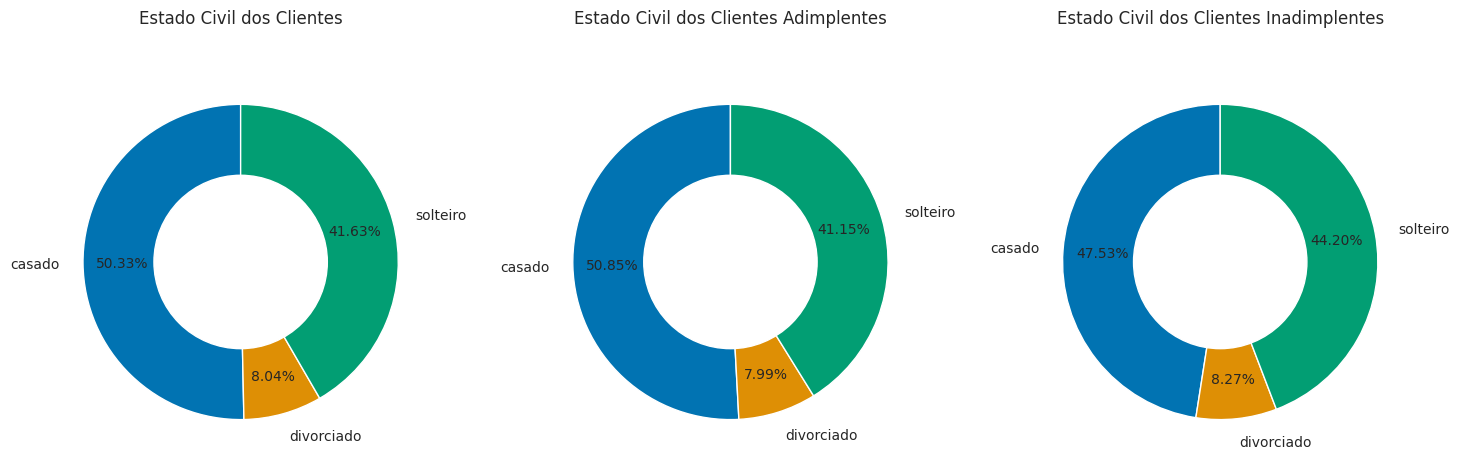

In [30]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

gerar_graficos_rosca(coluna, titulos)

Como a variável **Estado Civil** possui apenas 3 valores distintos, pode-se optar pelo gráfico de rosca, mostrando as frequências relativas de cada valor. </br>
Embora tenhamos uma frequência relativa um pouco maior entre solteiros e menor entre os casados no gráfico de clientes inadimplentes ao compararmos com os outros gráficos, os percentuais ainda são bem próximos e a variável **Estado Civil** não parece influenciar o valor da variável resposta.

* Criando função para gerar 3 gráficos de barras na mesma linha para 3 dataframes distintos

In [51]:
def gerar_graficos_barras(coluna: str, titulos: list) -> None:
    
    plt_coluna = 0
    linhas = 1
    colunas = 3
    max_y = 0
    
    if len(titulos) == 3:
        fig, ax = plt.subplots(linhas, colunas, figsize=(15, 5), sharex=True) # 3 gráficos lado a lado

        for dataframe in [credito_df, adimplente_df, inadimplente_df]:

            df_to_plot = dataframe[coluna].value_counts().reset_index()
            df_to_plot.rename(columns={'count': 'frequencia_absoluta'}, inplace=True) # renomeia a coluna do dataframe criado
            df_to_plot.sort_values(by=coluna, inplace=True)
            
            grafico = sns.barplot(x=df_to_plot.index, y=df_to_plot['frequencia_absoluta'], ax= ax[plt_coluna])
            grafico.set(title=titulos[plt_coluna], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
            grafico.set_xticklabels(labels=grafico.get_xticklabels(), rotation=75) # rotaciona categorias em 75°

            _, max_y_grafico = grafico.get_ylim() # limites (min, max) do eixo y do gráfico
            max_y = max_y_grafico if max_y_grafico > max_y else max_y # definindo valor máximo de y
            grafico.set(ylim=(0, max_y)) # redefinindo eixo y para ficar igual nos 3 gráficos

            plt_coluna += 1
        
        plt.tight_layout(pad=2)
        fig.show()
    
    else:
        print('ERRO: Você deve fornecer uma lista com 3 títulos (1 para cada gráfico)')

* Aplicando a função para ver a relação entre a variável **escolaridade** e a variável resposta (**default**)

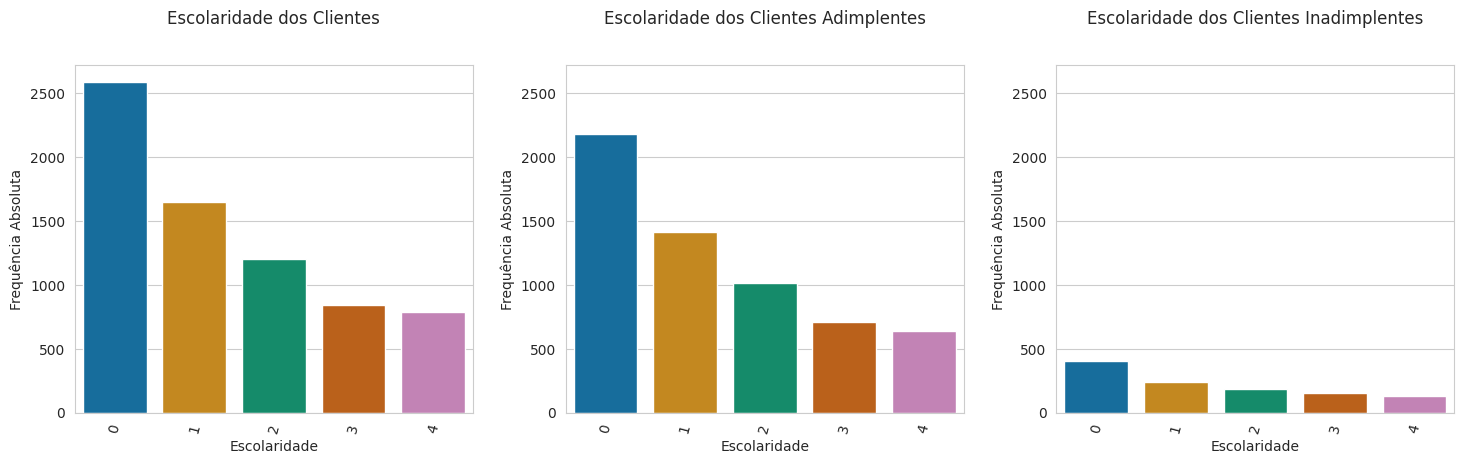

In [52]:
# analisando a influência da variável escolaridade no default

coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

gerar_graficos_barras(coluna, titulos)

No gráfico de barras, com o mesmo eixo Y para frequências absolutas, é possível notar o desbalanço da base de dados, que possui mais clientes adimplentes do que clientes inadimplentes, porém notamos que o perfil em todos os gráficos ainda é o mesmo, tendo praticamente a mesma ordem dos tamanhos das categorias. Assim, a variável resposta não parece ser afetada pela variável **escolaridade**.

* Aplicando função gráfico de barras para ver a relação entre a variável **salario_anual** e a variável resposta (**default**)

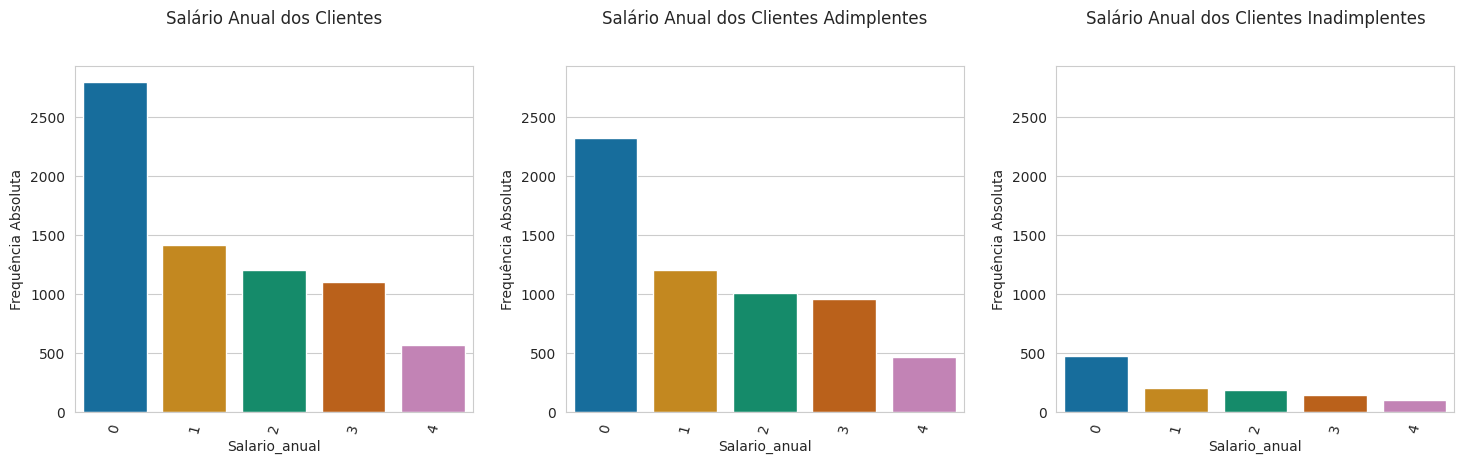

In [53]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

gerar_graficos_barras(coluna, titulos)

Gráficos também com perfis parecidos, o que denota que o valor do **default** não parece ser afetado pela variável **Salário Anual**.

* Aplicando a função gráfico de barras para ver a relação entre a variável **tipo_cartão** e a variável resposta (**default**)

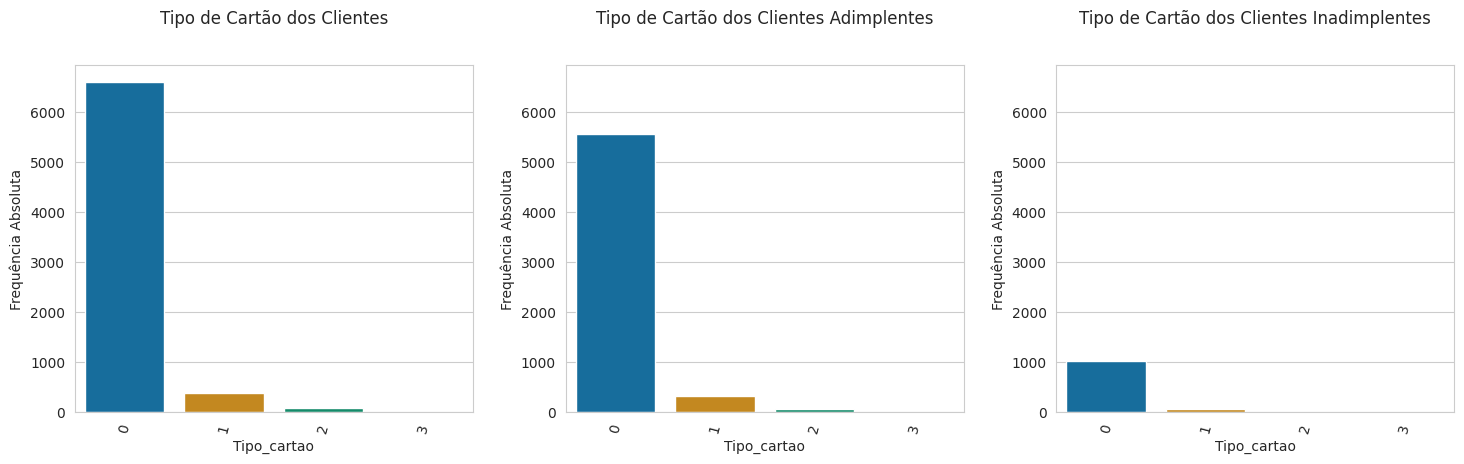

In [54]:
coluna = 'tipo_cartao'
titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']

gerar_graficos_barras(coluna, titulos)

Gráficos também com perfis parecidos, o que denota que o valor do **default** não parece ser afetado pela variável **Tipo de Cartão**.
</br></br>
NOTA: A coluna *tipo_cartao* possui poucas categorias e poderia ser analisada com gráfico de rosca, porém a visualização ficou pior.

### **4.2. Visualizações Numéricas**

* Mostrando as colunas numéricas que serão analisadas

In [35]:
credito_df.drop(['id', 'default'], axis=1).select_dtypes('number').head() # cinco primeiras linhas

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


* Criando uma função para gerar 3 histogramas na mesma linha para 3 dataframes distintos

In [55]:
def gerar_histograma(coluna: str, titulos: list) -> None:
    
    plt_coluna = 0
    linhas = 1
    colunas = 3
    max_y = 0
    
    if len(titulos) == 3:
        fig, ax = plt.subplots(linhas, colunas, figsize=(15, 5), sharex=True) # 3 gráficos lado a lado

        for dataframe in [credito_df, adimplente_df, inadimplente_df]:

            grafico = sns.histplot(x=coluna, data=dataframe, stat='count', ax= ax[plt_coluna])
            grafico.set(title=titulos[plt_coluna], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

            _, max_y_grafico = grafico.get_ylim() # limites (min, max) do eixo y do gráfico
            max_y = max_y_grafico if max_y_grafico > max_y else max_y # definindo valor máximo de y
            grafico.set(ylim=(0, max_y)) # redefinindo eixo y para ficar igual nos 3 gráficos

            plt_coluna += 1
        
        plt.tight_layout(pad=2)
        fig.show()
    
    else:
        print('ERRO: Você deve fornecer uma lista com 3 títulos (1 para cada gráfico)')

* Aplicando a função histograma para ver a relação entre a variável **idade** e a variável resposta (**default**)

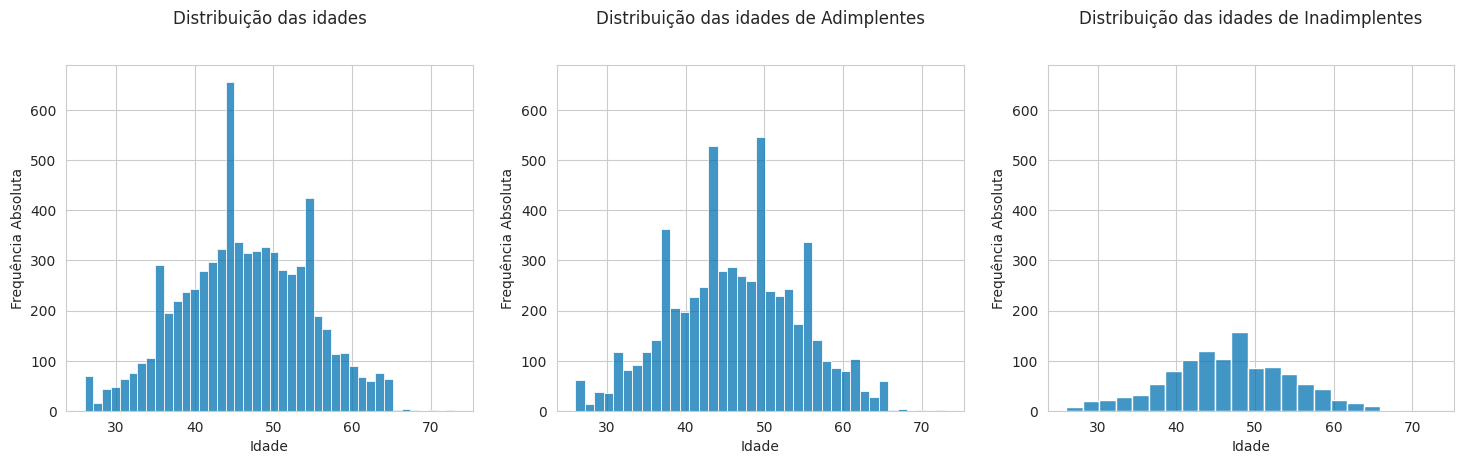

In [56]:
coluna = 'idade'
titulos = ['Distribuição das idades', 'Distribuição das idades de Adimplentes', 'Distribuição das idades de Inadimplentes']

gerar_histograma(coluna, titulos)

Devido ao desbalanceamento dos dados, o histograma de inadimplentes é mais achatado, mas ainda assim é possível notar que as distribuições são parecidas (semelhantes inclusive com uma distribuição normal), o que denota que o valor do **default** não parece ser afetado pela variável **Idade**.

* Aplicando a função histograma para ver a relação entre a variável **meses_de_relacionamento** e a variável resposta (**default**)

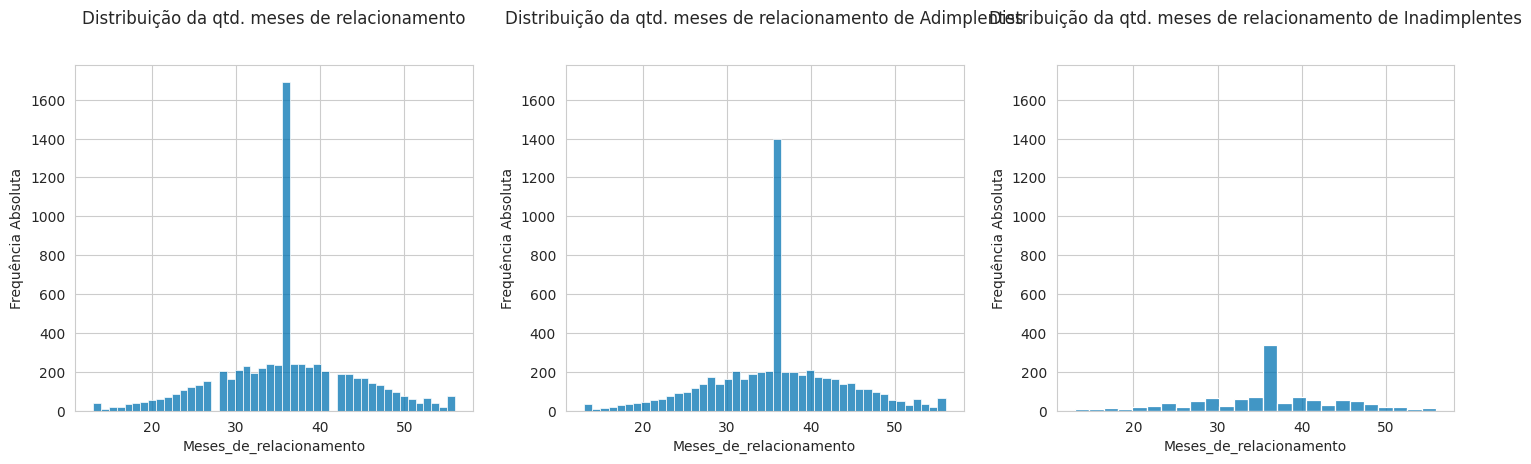

In [57]:
coluna = 'meses_de_relacionamento'
titulos = ['Distribuição da qtd. meses de relacionamento',
           'Distribuição da qtd. meses de relacionamento de Adimplentes',
           'Distribuição da qtd. meses de relacionamento de Inadimplentes']

gerar_histograma(coluna, titulos)

Não é notória uma relação entre os valores da variável **default** e **meses_de_relacionamento**

* Criando função para gerar 3 gráficos de barras percentuais na mesma linha para 3 dataframes distintos

In [58]:
def gerar_graficos_barras_pct(coluna: str, titulos: list) -> None:
    
    plt_coluna = 0
    linhas = 1
    colunas = 3
    
    if len(titulos) == 3:
        fig, ax = plt.subplots(linhas, colunas, figsize=(15, 5), sharex=True) # 3 gráficos lado a lado

        for dataframe in [credito_df, adimplente_df, inadimplente_df]:

            df_to_plot = dataframe[coluna].value_counts().reset_index()
            df_to_plot.rename(columns={'count': 'frequencia_absoluta'}, inplace=True) # renomeia a coluna do dataframe criado
            df_to_plot['frequencia_relativa'] = round(df_to_plot['frequencia_absoluta'] / df_to_plot.frequencia_absoluta.sum(), 2) * 100
            df_to_plot[coluna] = df_to_plot.index # adiciona a coluna de index
            df_to_plot.sort_values(by=coluna, inplace=True) # ordena pela coluna

            grafico = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_relativa'], ax= ax[plt_coluna])
            grafico.set(title=titulos[plt_coluna], xlabel=coluna.capitalize(), ylabel='Frequência Relativa (%)')
            grafico.set(ylim=(0, 60)) # eixo y de 0 a 50%

            plt_coluna += 1
        
        plt.tight_layout(pad=2)
        fig.show()
        
    else:
        print('ERRO: Você deve fornecer uma lista com 3 títulos (1 para cada gráfico)')

* Aplicando a função gráfico de barras percentuais para ver a relação entre a variável **dependentes** e a variável resposta (**default**)

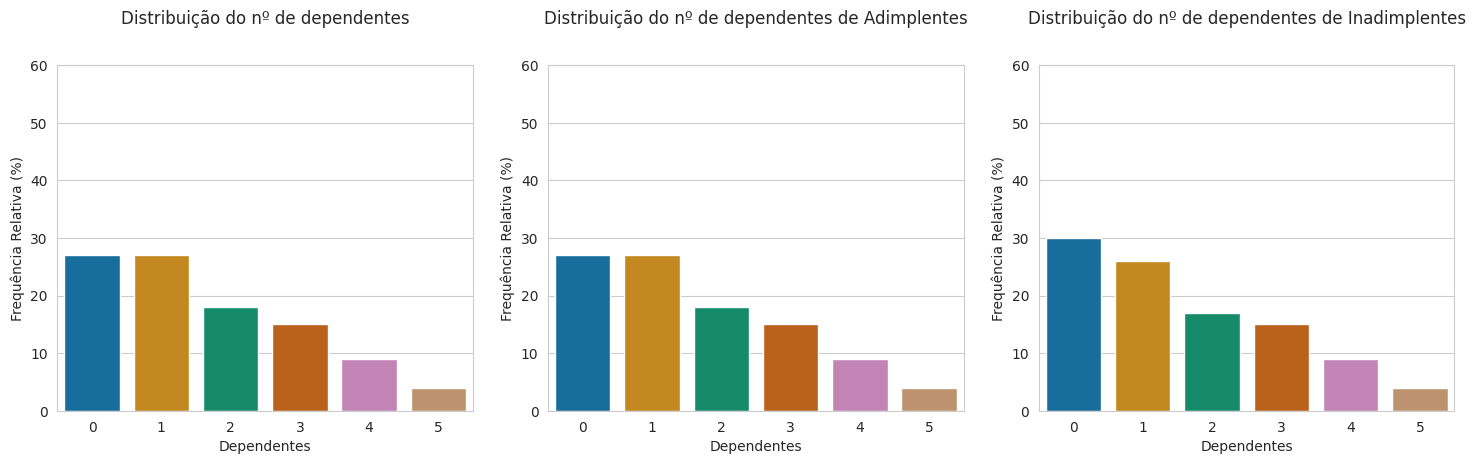

In [59]:
coluna = 'dependentes'
titulos = ['Distribuição do nº de dependentes', 'Distribuição do nº de dependentes de Adimplentes', 'Distribuição do nº de dependentes de Inadimplentes']

gerar_graficos_barras_pct(coluna, titulos)

Apesar do número de dependentes ser uma variável numérica, ele não é uma variável contínua, por isso é possível utilizar um gráfico de barras para essa variável discreta que possui poucos valores distintos. Nota-se nos gráficos quase a mesma ordem de tamanho das colunas (percentuais parecidos), o que denota que o valor do **default** não parece ter relação com a variável **dependentes**.

* Aplicando a função gráfico de barras percentuais para ver a relação entre a variável **qtd_produtos** e a variável resposta (**default**)

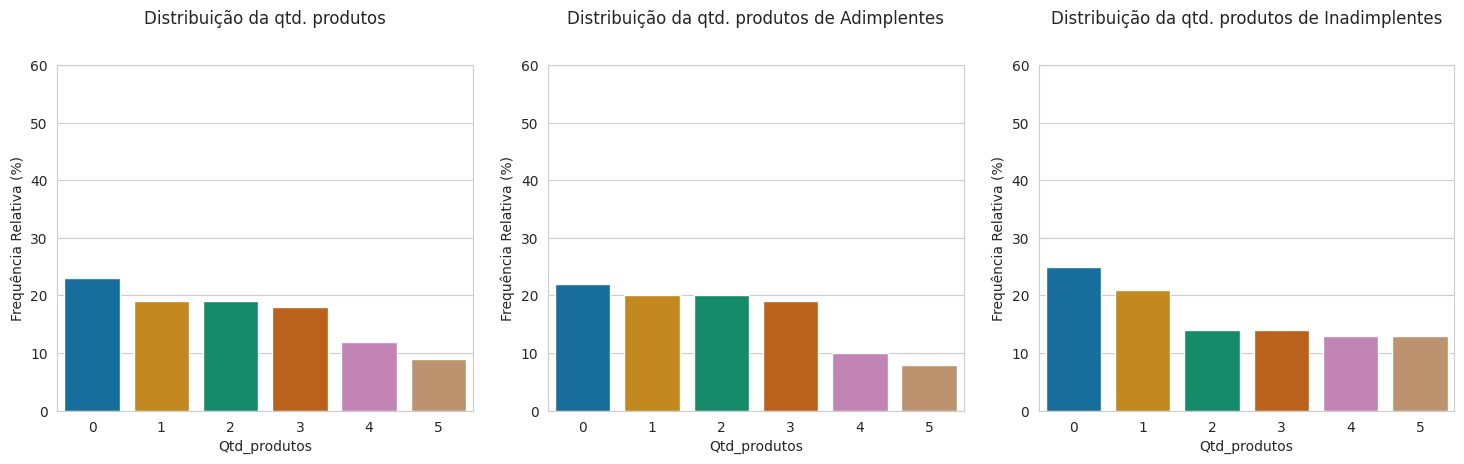

In [60]:
coluna = 'qtd_produtos'
titulos = ['Distribuição da qtd. produtos',
           'Distribuição da qtd. produtos de Adimplentes',
           'Distribuição da qtd. produtos de Inadimplentes']

gerar_graficos_barras_pct(coluna, titulos)

No gráfico de clientes inadimplentes, nota-se uma diferença na ordem dos tamanhos das colunas em relação aos outros gráficos. Apesar de clientes inadimplentes também contratarem até 6 produtos, o gráfico nos mostra que podemos encontrar um maior número de inadimplentes entre aqueles que contratam até 3 produtos.

* Aplicando a função gráfico de barras percentuais para ver a relação entre a variável **iteracoes_12m** e a variável resposta (**default**)

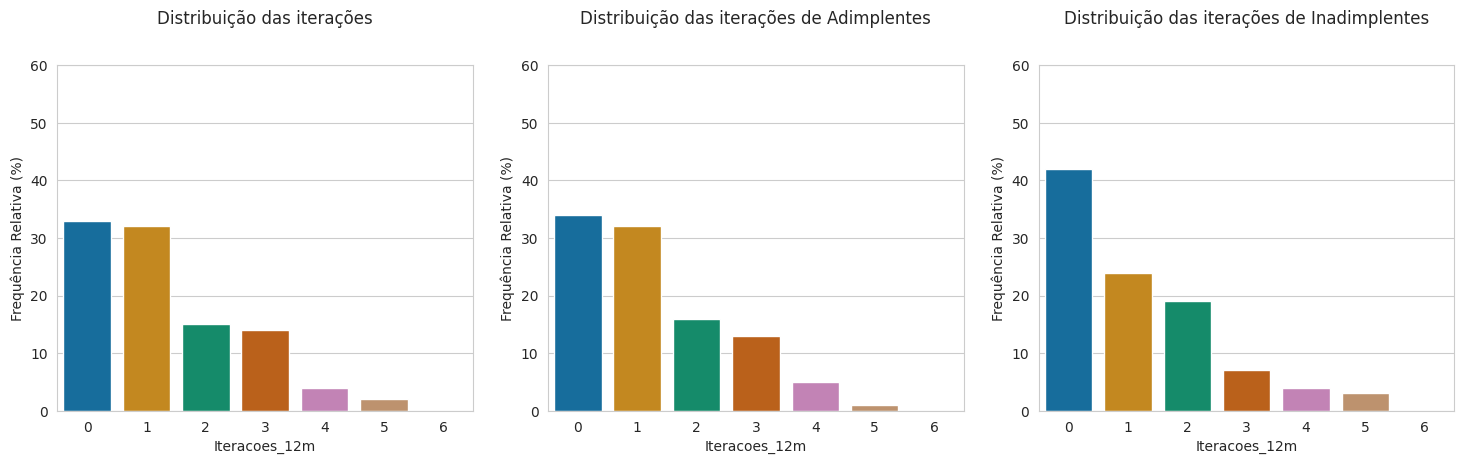

In [61]:
coluna = 'iteracoes_12m'
titulos = ['Distribuição das iterações',
           'Distribuição das iterações de Adimplentes',
           'Distribuição das iterações de Inadimplentes']

gerar_graficos_barras_pct(coluna, titulos)

Os gráficos são semelhantes, porém sempre haverá iterações com clientes inadimplentes. Também nota-se que são realizadas 6 iterações apenas com clientes inadimeplentes. Mas os motivos dos acontecimentos descritos podem ser devidos a própria inadimplência, tendo uma relação inversa de causa e efeito, na qual os inadimplentes já foram identificados.

* Aplicando a função gráfico de barras percentuais para ver a relação entre a variável **meses_inativo_12m** e a variável resposta (**default**)

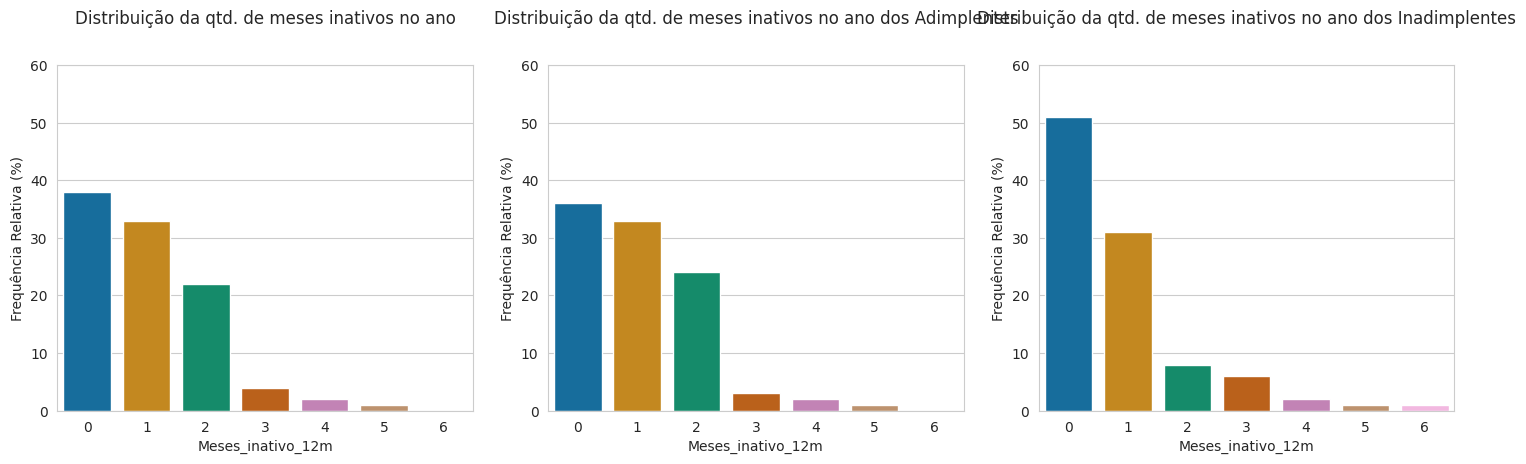

In [62]:
coluna = 'meses_inativo_12m'
titulos = ['Distribuição da qtd. de meses inativos no ano',
           'Distribuição da qtd. de meses inativos no ano dos Adimplentes',
           'Distribuição da qtd. de meses inativos no ano dos Inadimplentes']

gerar_graficos_barras_pct(coluna, titulos)

Apesar de haver menor frequência quando a quantidade de meses inativos é igual a 1 e maior frequência quando a quantidade é igual a 3 e 4, o gráfico de inadimplentes ainda mostra praticamente a mesma ordem de tamanho das colunas. Esta variável não parece ajudar a identificar a variável resposta, uma vez que entre os clientes que ficam 3 a 4 meses inativos ainda haverão muitos clientes adimplentes.

* Criando função para gerar 3 gráficos de box-plot na mesma linha para 3 dataframes distintos

In [63]:
def gerar_boxplot(coluna: str, titulos: list) -> None:
    
    plt_coluna = 0
    linhas = 1
    colunas = 3
    max_y = 0

    if len(titulos) == 3:
        fig, ax = plt.subplots(linhas, colunas, figsize=(15, 5), sharex=True) # 3 gráficos lado a lado

        for dataframe in [credito_df, adimplente_df, inadimplente_df]:

            grafico = sns.boxplot(y=coluna, data=dataframe, orient="v", ax= ax[plt_coluna])
            grafico.set(title=titulos[plt_coluna], xlabel=coluna.capitalize(), ylabel='Limite de crédito')

            _, max_y_grafico = grafico.get_ylim() # limites (min, max) do eixo y do gráfico
            max_y = max_y_grafico if max_y_grafico > max_y else max_y # definindo valor máximo de y
            grafico.set(ylim=(0, max_y)) # redefinindo eixo y para ficar igual nos 3 gráficos

            plt_coluna += 1

        plt.tight_layout(pad=2)
        fig.show()
        
    else:
        print('ERRO: Você deve fornecer uma lista com 3 títulos (1 para cada gráfico)')

* Aplicando a função gráfico box-plot para ver a relação entre a variável **limite_credito** e a variável resposta (**default**)

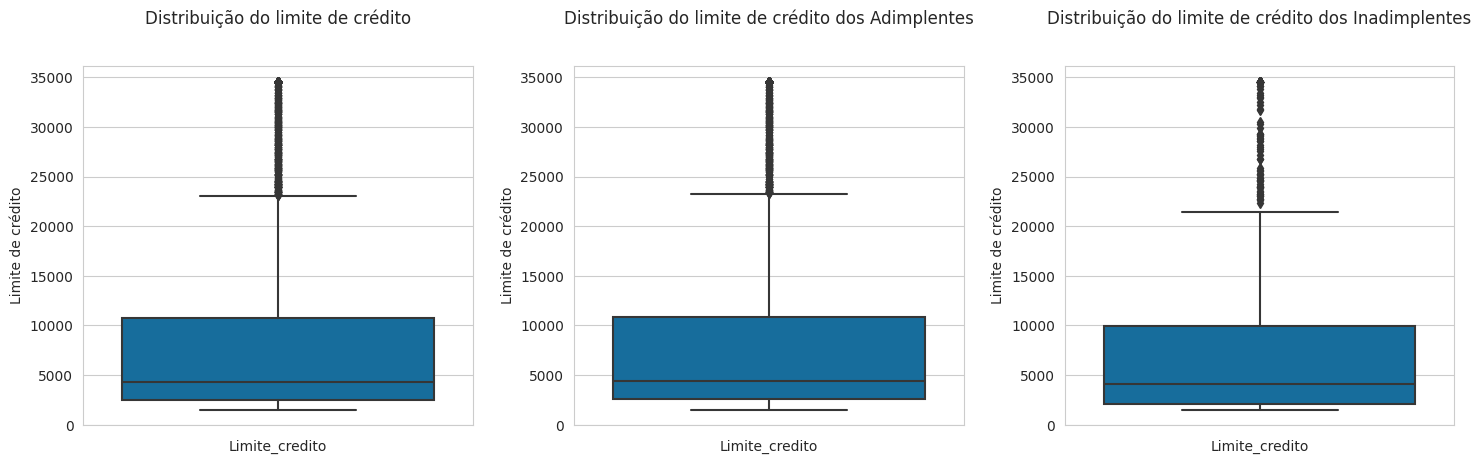

In [64]:
coluna = 'limite_credito'
titulos = ['Distribuição do limite de crédito',
           'Distribuição do limite de crédito dos Adimplentes',
           'Distribuição do limite de crédito dos Inadimplentes']

gerar_boxplot(coluna, titulos)

O gráfico boxplot mostra os outliers que aumentam o valor da média (tornando-se maior que a mediana) e o valor do desvio-padrão. Mas as distribuições de **Limite de Crédito** são semelhantes tanto para adimplentes como para inadimplentes, mostrando uma assimetria positiva e concentrações de dados próximas.

* Aplicando a função gráfico box-plot para ver a relação entre a variável **valor_transacoes_12m** e a variável resposta (**default**)

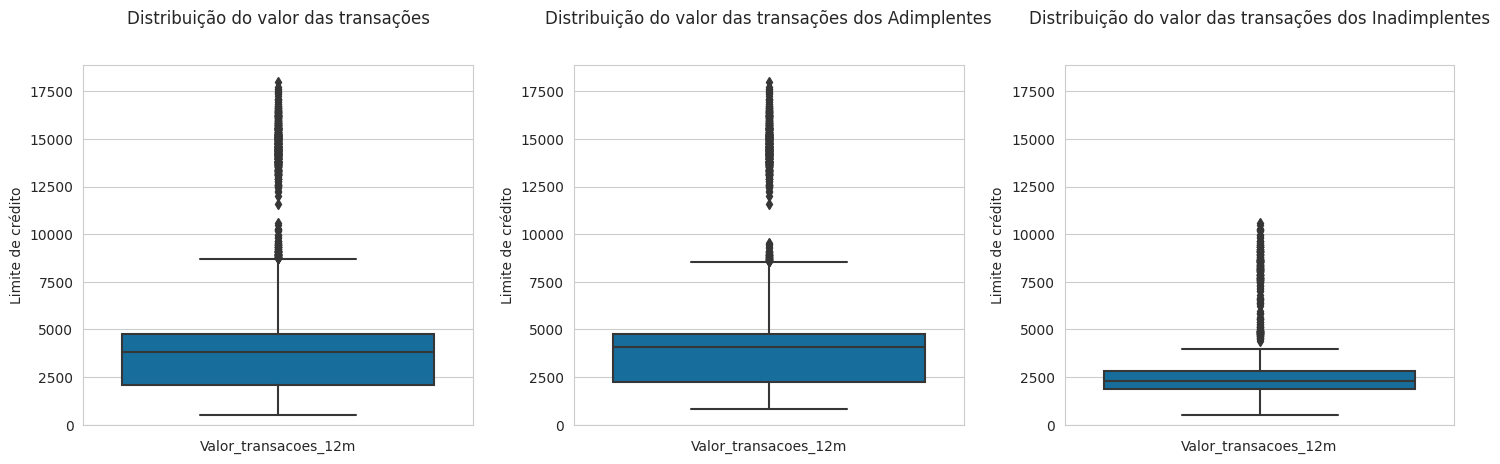

In [65]:
coluna = 'valor_transacoes_12m'
titulos = ['Distribuição do valor das transações',
           'Distribuição do valor das transações dos Adimplentes',
           'Distribuição do valor das transações dos Inadimplentes']

gerar_boxplot(coluna, titulos)

Apesar de ambas as distribuições posuirem outliers que aumentam o valor da média e do desvio padrão, além dos valores máximos serem diferentes (não há inadimplentes acima de 11000), também notamos distribuições diferentes. No gráfico de inadimplemtes percebemos que o valor das transações costumam, em geral, ser mais baixas (abaixo de ~4300) e que 50% dos valores estão próximos a uma faixa entre 1800 e 2800.

* Aplicando a função gráfico box-plot para ver a relação entre a variável **qtd_transacoes_12m** e a variável resposta (**default**)

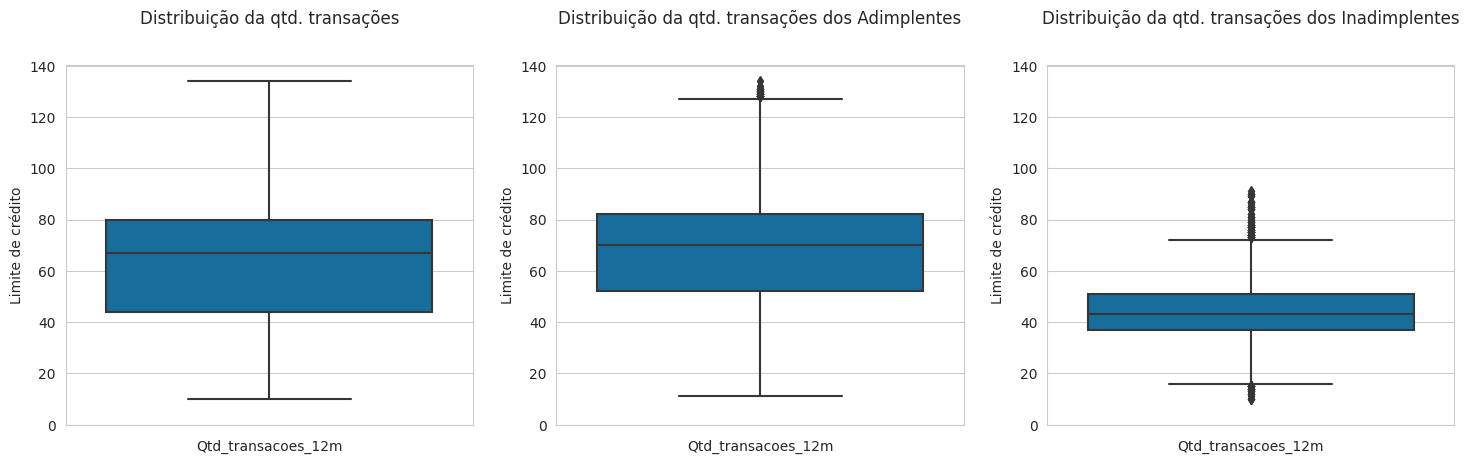

In [66]:
coluna = 'qtd_transacoes_12m'
titulos = ['Distribuição da qtd. transações',
           'Distribuição da qtd. transações dos Adimplentes',
           'Distribuição da qtd. transações dos Inadimplentes']

gerar_boxplot(coluna, titulos)

O gráfico nos mostra que a inadimplência ocorre entre os clientes que transacionam menos, sendo 50% dos inadimplentes estão concentrados na faixa de 35 a 50 transações. Se retirarmos os outliers do gráfico de inadimplentes, teríamos uma distribuição de 15 a 75 transações.

* Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

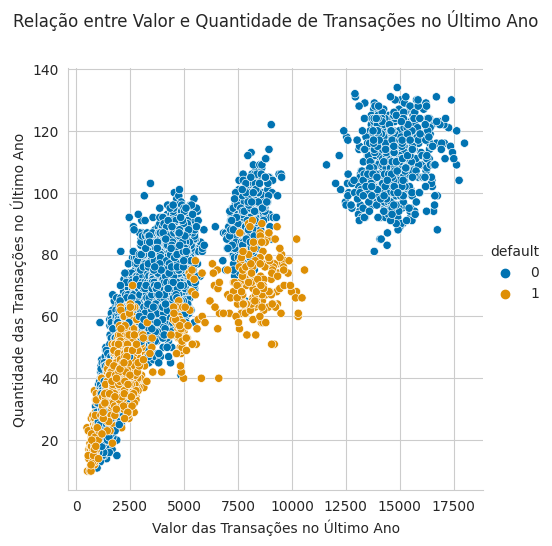

In [48]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=credito_df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

Nota-se que pessoas que transacionam muito e em valores alto não apresentam inadimplência, já pessoas que transacionam menos nos outros dois grupos, são as pessoas que costumam ficar inadimplentes. </br>
Ainda é possível segmentar o gráfico acima pela **quantidade de produtos contratados** para tentar identificar mais grupos homogêneos.

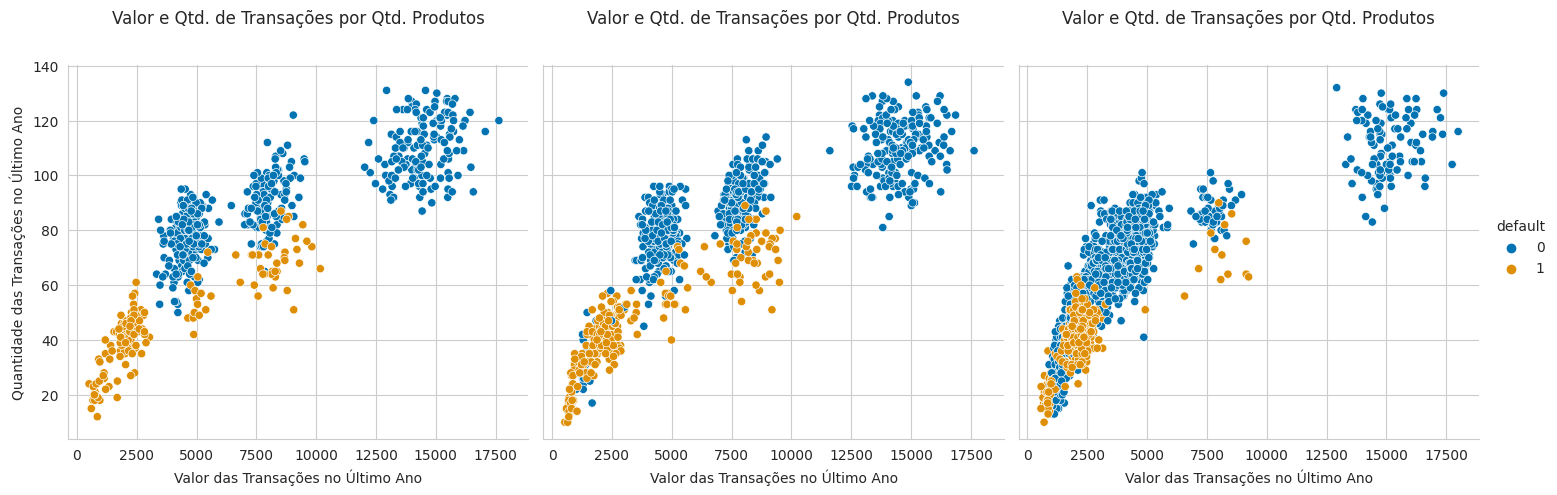

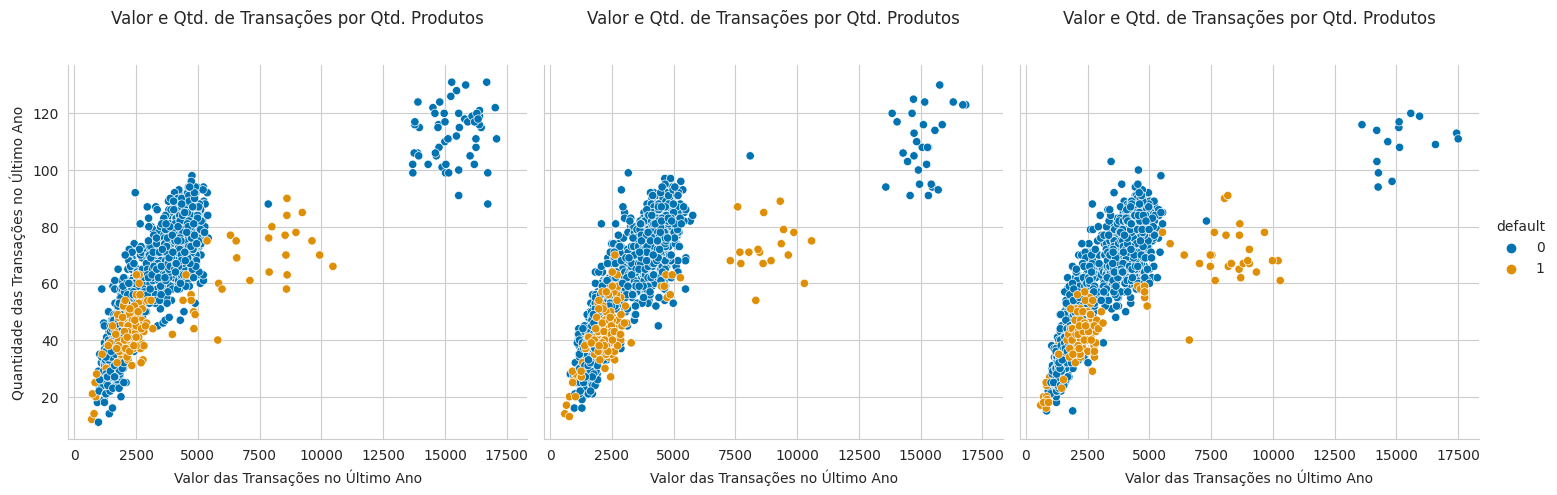

In [49]:
produtos3_df = credito_df.query('qtd_produtos <= 3')
produtos6_df = credito_df.query('qtd_produtos > 3')

f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=produtos3_df, hue='default', col='qtd_produtos')
_ = f.set(
    title='Valor e Qtd. de Transações por Qtd. Produtos',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=produtos6_df, hue='default', col='qtd_produtos')
_ = f.set(
    title='Valor e Qtd. de Transações por Qtd. Produtos',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

Agora é possível também perceber que para apenas 1 ou 2 produtos contratados, pessoas que transacionam pouco e valores baixo, costumam ficar inadimplentes. E também é possível identificar grupo de inadimplentes com pessoas contratam 3 ou mais produtos e transacionam uma quantidade média com valores também médios.

## 5\. Resumo dos insights gerados

Após analisar cada uma das variáveis independentes da tabela que contem o conjunto de dados limpo e consistente, tentando explicar suas relações com a variável **default**, foi possível perceber que as variáveis explicativas **qtd_produtos**, **valor_transacoes_12m** e **qtd_transacoes_12m** são os atributos que deveriam ser melhor analisados para entender a diferença de comportamento do cliente. </br> </br>
Ao gerar o gráfico de relação entre **Valor e Quantidade de Transações** no último ano, foi possível identificar um grupo de adimplentes que realiza muitas transações de valores altos que não despertam atenção. Em geral, o gráfico comunica que quanto menor o número de transações nos outros dois grupos (valores médios e baixos) maior a possibilidade de um cliente torna-se inadimplente. </br>
Quando diminui-se a granularidade para obter mais detalhes ao separar os gráficos por **quantidade de produtos contratados** conseguiu-se encontrar os grupos que despertam mais atenção. No caso de clientes que contratam 1 ou 2 produtos, deve-se olhar para aqueles que transacionam pouco (abaixo de 60) e valores abaixo de 3000. E no caso de clientes que contratam 3 ou mais produtos, apesar de ainda termos inadimpentes que transacionam pouco a valores baixos, temos grupos quase homogêneos de inadimplentes que realizam entre 60 e 90 transações com valores entre 7 e 11 mil.
